<a href="https://colab.research.google.com/github/BimsaraS99/UCB-algorithm-Reinforcement-Learning-ml/blob/main/upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

### **Problem**

*A company has designed 10 different ads and wants to determine the best ad for a large advertising campaign on Facebook. To identify the best ad design, they conduct trials for each ad and employ a UCB (Upper Confidence Bound) algorithm to make a data-driven decision.*

## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [5]:
dataset.sample(5)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
3981,0,0,0,0,0,0,0,0,0,0
5228,1,0,0,0,1,0,0,0,0,0
6055,0,0,0,0,1,0,0,0,0,0
8520,0,0,0,0,0,0,0,0,0,0
9100,0,1,0,0,1,0,0,0,0,0


In [6]:
dataset.sum(axis=0)

Ad 1     1703
Ad 2     1295
Ad 3      728
Ad 4     1196
Ad 5     2695
Ad 6      126
Ad 7     1112
Ad 8     2091
Ad 9      952
Ad 10     489
dtype: int64

---

It's possible that Ad 4 was identified as the most rewarding ad by the UCB algorithm, even though Ad 5 had the highest number of clicks. Here are some potential reasons:

**Exploration vs. Exploitation:**

UCB (Upper Confidence Bound) algorithms aim to balance exploration and exploitation. While Ad 5 may have initially received the most clicks, indicating exploitation of its past performance, the UCB algorithm also considers uncertainty. Ad 4, despite fewer clicks, might exhibit a higher conversion rate or other desirable outcomes, making it a priority for exploration.

**Short-term vs. Long-term Gains:**

Ad 5's high Click-Through Rate (CTR) could be a momentary trend or influenced by specific circumstances during the 10,000 ad displays. UCB, designed for long-term success, considers consistent trends and potential future rewards. Ad 4 might demonstrate a more reliable upward trend in its rewards (clicks, conversions, etc.) compared to Ad 5.

**Additional Factors:**

The UCB algorithm may consider contextual factors not present in the provided dataset (e.g., target audience, placement, time of day). Ad 4 might perform better in specific user segments or contexts, contributing to its overall value.

The reward metric used by the UCB algorithm may not be limited to clicks. Ad 4 could generate higher conversions, revenue, or other desirable outcomes, even with fewer clicks than Ad 5.

In conclusion, without specific details about your campaign and UCB algorithm implementation, it's challenging to pinpoint why Ad 4 was chosen as the most rewarding. To gain a precise understanding, analyze the definition of the "reward" metric, the historical performance beyond the initial 10,000 impressions, and contextual factors associated with each ad's performance.

---

Ah, the exploration vs. exploitation dilemma! This fundamental concept pops up in many domains, from decision-making in psychology to resource allocation in business. It essentially boils down to the question: **Do we stick with what we know works or venture out to discover something potentially better?**

**Exploration** involves seeking new information and trying out new options. It's about venturing into the unknown, taking risks, and potentially discovering novel solutions. Think of it like exploring a new neighborhood to find hidden gems.

**Exploitation** focuses on maximizing the benefits of what we already know. It's about refining existing strategies, optimizing known solutions, and capitalizing on our current knowledge. Imagine honing your culinary skills in your favorite kitchen to become a master chef.

Both strategies have their merits and drawbacks:

**Exploration:**

* **Pros:** Can lead to breakthroughs, innovation, and discovering better options.
* **Cons:** May be inefficient in the short term, risky, and result in failures.

**Exploitation:**

* **Pros:** Efficient, reliable, and provides immediate benefits.
* **Cons:** Can lead to stagnation, missing out on potential opportunities, and becoming stuck in local optima (not finding the absolute best solution).

The key challenge lies in finding the **right balance**. It's not about abandoning one for the other, but about understanding when to switch between them. Some factors to consider:

* **Time horizon:** If you have limited time, exploitation might be more important. Conversely, with a longer timeframe, exploration can have greater payoff.
* **Uncertainty:** Higher uncertainty about the environment favors exploration, while lower uncertainty makes exploitation more attractive.
* **Rewards:** The potential rewards of exploration should outweigh the short-term gains of exploitation.

Finding the optimal balance is often context-dependent and requires adaptability. This is where algorithms like UCB come in, as they can make calculated decisions between exploration and exploitation based on data and historical performance.

I hope this provides a clearer picture of the exploration vs. exploitation dilemma. If you have any further questions or specific examples you'd like to discuss, feel free to ask!



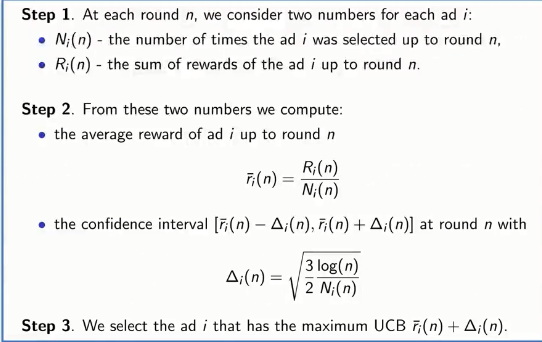

## Implementing UCB

In [7]:
import math

In [8]:
N = 10000 # N - number of round before decision (trials)
d = 10 # d - Number of types of ads (ads)

ads_selected = list()
numbers_of_selections = [0] * d # Ni(n)
sums_of_rewards = [0] * d # Ri(n) sum of rewards

total_reward = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0

    # go through the each ad of particular round (n)
    for i in range(0, d):

        if numbers_of_selections[i] > 0: # checking this, because sum of reward cannot be divide by zero
            exploitation = sums_of_rewards[i] / numbers_of_selections[i] # exploitation - r(bar)(n)
            exploration = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i]) # exploration - delat_i
            upper_bound = exploitation + exploration

        else:
            upper_bound = 1e400 # giving chance to all ads to first 10 rounds

        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i

    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad] # Find out if the user is clicked on the ad, I would be 1 or 0
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

## Visualising the results

10000


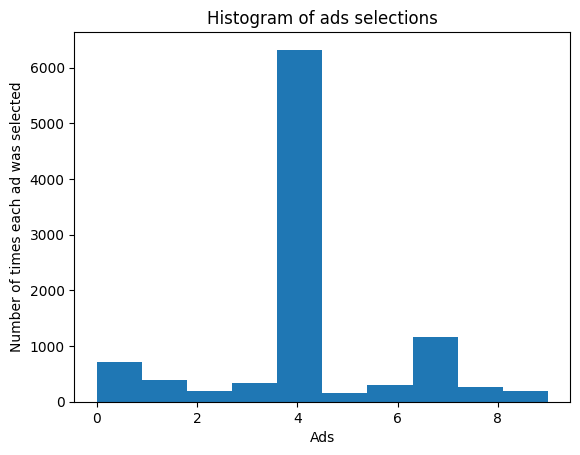

In [9]:
print(len(ads_selected))
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

### **Advertisement 05 will be chosen to run a Facebook ad campaign.**

The Upper Confidence Bound (UCB) algorithm is a class of algorithms used in the context of multi-armed bandit problems and reinforcement learning. It addresses the exploration-exploitation trade-off, which is a fundamental challenge in decision-making when faced with uncertainty and multiple options. Here's an overview of key aspects related to the UCB algorithm:

1. **Exploration-Exploitation Trade-off:**
   - **Exploration:** Trying out different options to gather information about their potential rewards.
   - **Exploitation:** Choosing options that are currently believed to be the best based on existing knowledge to maximize short-term gains.
   - UCB aims to strike a balance between exploration and exploitation.

2. **Algorithm Principle:**
   - UCB algorithms assign a confidence bound to each option based on its past performance.
   - The algorithm selects the option with the highest Upper Confidence Bound for the next action.
   - The Upper Confidence Bound is calculated using a formula that typically involves the mean reward and a confidence interval term.

3. **UCB Formula:**

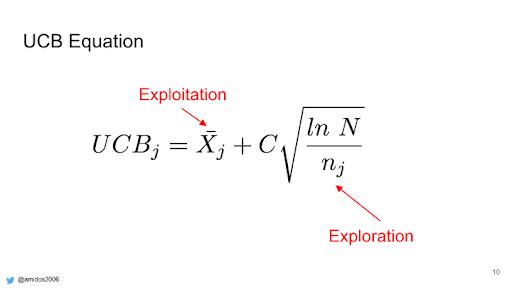

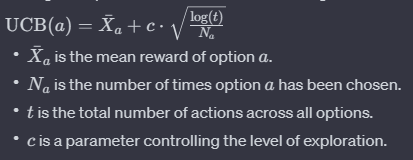

4. **Adaptability:**
   - UCB algorithms adapt their choices based on the observed outcomes, dynamically adjusting the exploration-exploitation balance.
   - As more data is collected, the algorithm refines its estimates of the true rewards and becomes more selective in its choices.

5. **Applications:**
   - UCB algorithms find applications in various fields, including online advertising, recommendation systems, clinical trials, resource allocation in wireless communication networks, and more.
   - They are particularly useful in scenarios where resources are limited, and the goal is to maximize cumulative rewards over time.

6. **UCB Variants:**
   - Several variants of the UCB algorithm exist, each with slight modifications to the basic formula or exploration strategy. Examples include UCB1, UCB-Tuned, and UCB-Normal.

7. **Challenges:**
   - While UCB algorithms are effective, they are not without challenges. One challenge is selecting an appropriate value for the exploration parameter \(c\). The choice of \(c\) influences the algorithm's behavior in terms of exploration and exploitation.

In summary, the UCB algorithm is a powerful tool for decision-making in uncertain environments where the goal is to balance the exploration of new options with the exploitation of known, high-reward options to maximize cumulative rewards over time.